# requirements

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from src.load_data import load_data

fbirn_data, demographics = load_data()
timeseries = fbirn_data["data"]
diagnoses = fbirn_data["diags"]
sexes = fbirn_data["sexes"]
ages = fbirn_data["ages"]

print(demographics)
print(f"# subjects: {timeseries.shape[0]}, # timepoints: {timeseries.shape[1]}, # features: {timeseries.shape[2]}")

     Category          Statistic/Label   Value
0   Diagnosis             Count HC (0)  160.00
1   Diagnosis             Count SZ (1)  151.00
2         Sex           Count Male (0)  230.00
3         Sex         Count Female (1)   81.00
4         Age                      Min   18.00
5         Age                      Max   62.00
6         Age                     Mean   37.88
7         Age                  Std Dev   11.24
8    Age Bins  Count Bin 0 (18.0-32.7)  119.00
9    Age Bins  Count Bin 1 (32.7-47.3)  117.00
10   Age Bins  Count Bin 2 (47.3-62.0)   75.00
# subjects: 311, # timepoints: 140, # features: 53


# 0. First milestone
- Write a general setup for the experiments
- Find important features using stattests 
- Train classifiers, inspect the features that they found important

In [11]:
from src.utils import corrcoef_batch

pcc_matrices = corrcoef_batch(timeseries)
pcc_matrices.shape

(311, 53, 53)

In [14]:
def analyze_group_differences(data, labels):
    groups = np.unique(labels)
    group_data = [data[labels == g] for g in groups]

    stat, p_value = stats.ttest_ind(group_data[0], group_data[1], axis=0, equal_var=False)
    return stat, p_value

/Users/ppopov1/miniconda3/envs/pile/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:611: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


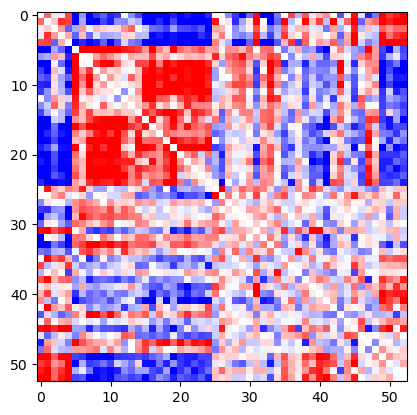

In [19]:
stat, p_value = analyze_group_differences(pcc_matrices, diagnoses)

plt.imshow(stat, cmap='bwr', vmin=-5, vmax=5)